In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from WindPy import w
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
DATA_DIR = 'D:/Data/search/stocks/'

In [4]:
files = [f for f in os.listdir(DATA_DIR)]

In [5]:
fname = '%s/%s'%(DATA_DIR, files[1])

In [6]:
name = files[1].split('-')[1].rstrip('.xlsx')

In [7]:
name = name.decode('gbk').encode('utf-8')

In [8]:
print name

万科


In [9]:
df = pd.read_excel(fname)

In [10]:
df = df.set_index(df.day_key)

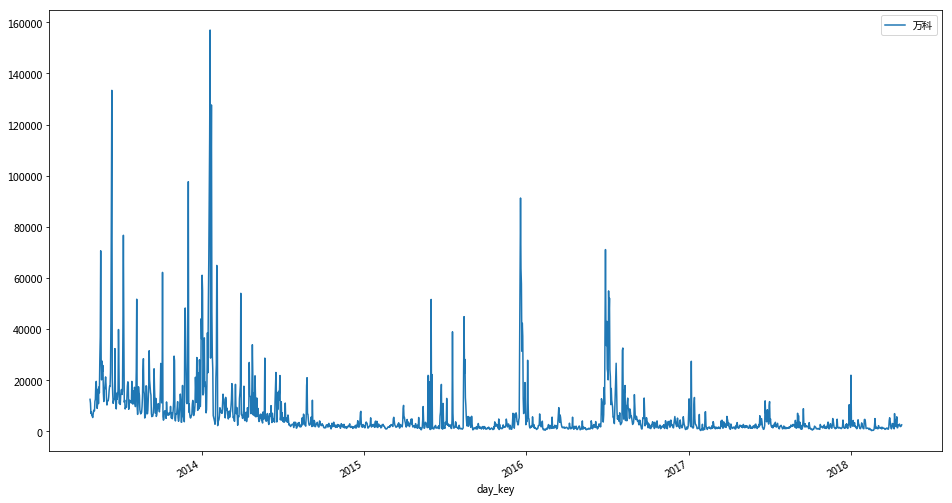

In [11]:
df['value'].plot(figsize=(16, 9), label=name)
plt.legend()

In [12]:
names, codes, pct = [], [], []
for f in files:
    fname = '%s/%s'%(DATA_DIR, f)
    name = f.split('-')[1].rstrip('.xlsx').decode('gbk').encode('utf-8')
    code = f.split('-')[0]
    df = pd.read_excel(fname)
    names.append(name)
    codes.append(code)
    pct.append(df['value'].rank(pct=True).iloc[-1])

In [13]:
df = pd.DataFrame({u'代码': codes, u'名称': names, u'百分位': pct})

In [14]:
df.sort_values(u'百分位', ascending=False).head(20)

,代码,名称,百分位
1325,600529,山东药玻,1.000000
954,300215,电科院,0.998904
318,002052,同洲电子,0.998557
1633,601518,吉林高速,0.997806
880,300126,锐奇股份,0.995556
1473,600778,友好集团,0.993724
687,002522,浙江众成,0.993333
378,002126,银轮股份,0.993333
874,300119,瑞普生物,0.992840
1177,600275,ST昌鱼,0.992840


In [15]:
dic = {}
for f in files:
    fname = '%s/%s'%(DATA_DIR, f)
    code = f.split('-')[0]
    temp = pd.read_excel(fname)
    temp = temp.set_index(temp['day_key'])
    dic[code] = temp['value']
vdf = pd.DataFrame(dic)

In [16]:
data = w.wsd('881001.WI', 'close', '2010-01-01', '2018-04-25')

In [17]:
pdf = pd.DataFrame(np.array(data.Data).T, columns=['close'], index=data.Times)

In [18]:
pdf.index = pd.to_datetime(pdf.index)

In [ ]:
x = vdf[vdf.index >= '2010-01-01'].rank(axis=1, pct=True).mean(axis=1)
y = pdf[pdf.index >= '2010-01-01']['close']

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(x, color='red')
# ax2 = ax1.twinx()
# ax2.plot(y)
# vdf[vdf.index >= '2017-01-01'].sum(axis=1).plot(figsize=(16, 9))